<a href="https://colab.research.google.com/github/sushmita201/Exploratory-Data-Analysis-US-Road-Accidents-2016-2023-/blob/main/Exploratory_Data_Analysis(RoadAccidents_US).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **US Accidents DATASETS(2016-2023)**
- **About the Datasets**
 - This datasets is taken from Kaggle.
  - This is a countrywide car accident dataset that covers 49 states of the USA. The accident data were collected from February 2016 to March 2023, using multiple APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by various entities, including the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road networks. The dataset currently contains approximately 7.7 million accident records. For more information about this dataset, please visit here.


In [2]:
pip install opendatasets --upgrade --quiet

In [3]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: halasharpoon
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents


100%|██████████| 653M/653M [00:08<00:00, 78.4MB/s]


# **Data Preparation and cleaning**
- Load the file using pandas
- Look at the infomation about the data and the columns
-Fix any missing or incorrect values

In [4]:
import pandas as pd
df = pd.read_csv('/content/us-accidents/US_Accidents_March23.csv', nrows=6000000)

In [ ]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [ ]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000000 entries, 0 to 5999999
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [ ]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,6.000000e+06,6.000000e+06,6.000000e+06,2.597238e+06,2.597238e+06,6.000000e+06,5.883986e+06,4.261915e+06,5.876653e+06,5.900280e+06,5.871422e+06,5.530597e+06,4.118880e+06
mean,2.225577e+00,3.607999e+01,-9.373091e+01,3.602212e+01,-9.416190e+01,5.372301e-01,6.252880e+01,5.897246e+01,6.477684e+01,2.956661e+01,9.103672e+00,7.788199e+00,9.139157e-03
std,4.724743e-01,5.004313e+00,1.693793e+01,5.243642e+00,1.767660e+01,1.814797e+00,1.892633e+01,2.259291e+01,2.272408e+01,9.808187e-01,2.645205e+00,5.362780e+00,1.177244e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.319294e+01,-1.121063e+02,3.308697e+01,-1.172132e+02,0.000000e+00,5.000000e+01,4.300000e+01,4.800000e+01,2.940000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.567279e+01,-8.677966e+01,3.604548e+01,-8.615786e+01,1.000000e-02,6.500000e+01,6.300000e+01,6.700000e+01,2.987000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.000702e+01,-8.033305e+01,4.003306e+01,-8.016695e+01,3.650000e-01,7.700000e+01,7.600000e+01,8.400000e+01,3.004000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,8.228000e+02,3.647000e+01


In [ ]:
numerics=['int64','float64']
newdf=df.select_dtypes(include=numerics)

In [ ]:
len(newdf.columns)

13

In [ ]:
#Finding the percentages of missing data in each columns.
missing_percentages=df.isna().sum().sort_values(ascending=False)/len(df)
missing_percentages[missing_percentages!=0]

,0
End_Lat,5.671270e-01
End_Lng,5.671270e-01
Precipitation(in),3.135200e-01
Wind_Chill(F),2.896808e-01
Wind_Speed(mph),7.823383e-02
Visibility(mi),2.142967e-02
Weather_Condition,2.087750e-02
Wind_Direction,2.062833e-02
Humidity(%),2.055783e-02
Temperature(F),1.933567e-02


<Axes: >

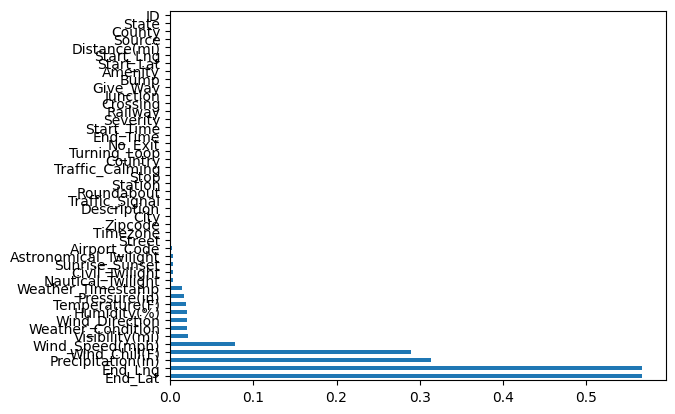

In [ ]:
#Ploting which column has maximum NaN values
missing_percentages.plot(kind='barh')

Remove columns that u dont need

## Exploratory Analysis and Visualisation
Columns we'll analyze
- City,Zipcode,Start_time,End_time,Source,Serierity,Lat end start,Long start end,street,Distance,Temperature,Weather

## **City**

In [5]:
Cities=df.City.unique()
Cities[:10]

array(['Dayton', 'Reynoldsburg', 'Williamsburg', 'Westerville',
       'Columbus', 'Miamisburg', 'Johnstown', 'Dublin',
       'Canal Winchester', 'Lebanon'], dtype=object)

In [ ]:
len(Cities)

13245

In [6]:
cities_by_accident=df.City.value_counts()
cities_by_accident[:10]

City
Houston        148341
Miami          134248
Charlotte      120866
Los Angeles    113668
Dallas         108746
Austin          86858
Orlando         85464
Raleigh         74070
Nashville       61976
Baton Rouge     61567
Name: count, dtype: int64

In [ ]:
'New York' in df.City

False

<Axes: ylabel='City'>

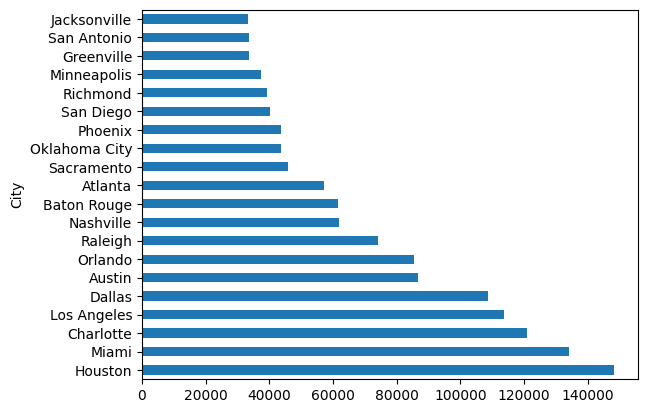

In [ ]:
#Top 20 Cities with maximum accidents.
cities_by_accident[:20].plot(kind='barh')

In [ ]:
type(cities_by_accident)

pandas.core.series.Series

In [8]:
import seaborn as sns
sns.set_style('darkgrid')

<ipython-input-9-14f2686850b2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cities_by_accident)


<Axes: xlabel='count', ylabel='Density'>

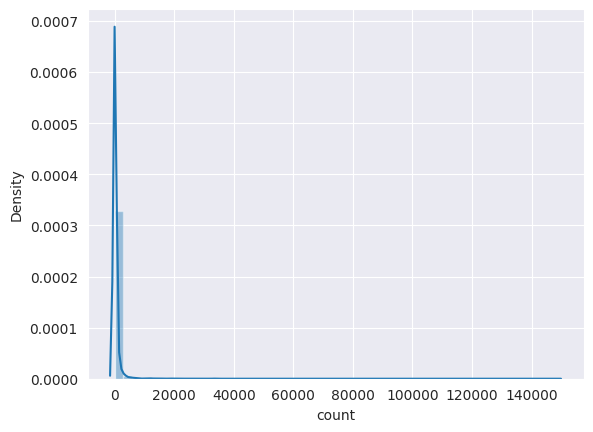

In [9]:
#Ploting the cities_by_accident
sns.distplot(cities_by_accident)

In [ ]:
#Percentages of cities where accident occured more than 1000 times is only 7%
high_accident_cities=cities_by_accident[cities_by_accident>=1000]
len(high_accident_cities/len(cities_by_accident))/len(cities_by_accident)

0.07376925400181214

In [ ]:
#Percentages of cities where accident occured less than 1000 times is only 92%
low_accident_cities=cities_by_accident[cities_by_accident<1000]/len(cities_by_accident)
len(low_accident_cities)/len(cities_by_accident)

0.9262307459981879

<Axes: xlabel='count', ylabel='Count'>

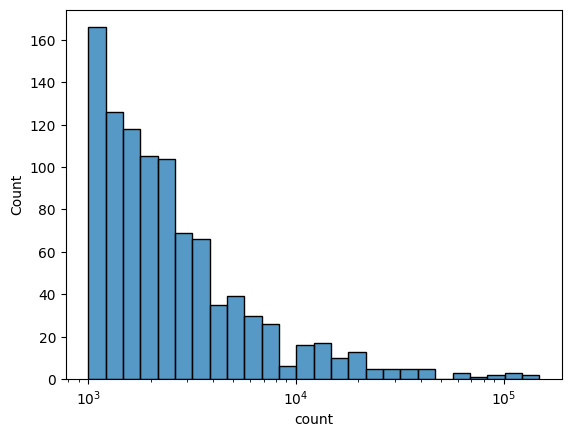

In [ ]:
sns.histplot(high_accident_cities,log_scale=True)

<Axes: xlabel='count', ylabel='Count'>

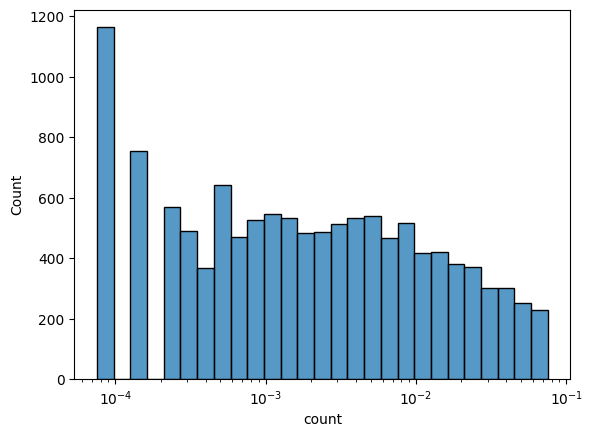

In [ ]:
sns.histplot(low_accident_cities,log_scale=True)

In [ ]:
len(cities_by_accident[cities_by_accident==1])
#  1164 cities report only 1 accident which is quite unusual

1164

**Start Time**

In [ ]:
df.Start_Time[0]

'2016-02-08 05:46:00'

In [ ]:
df.Start_Time=pd.to_datetime(df['Start_Time'],errors="coerce")
df.Start_Time[0]

Timestamp('2016-02-08 05:46:00')

In [ ]:
hour=df.Start_Time.dt.hour
hour

0           5.0
1           6.0
2           6.0
3           7.0
4           7.0
           ... 
5999995     1.0
5999996    21.0
5999997     7.0
5999998    12.0
5999999    14.0
Name: Start_Time, Length: 6000000, dtype: float64

<Axes: xlabel='Start_Time', ylabel='Count'>

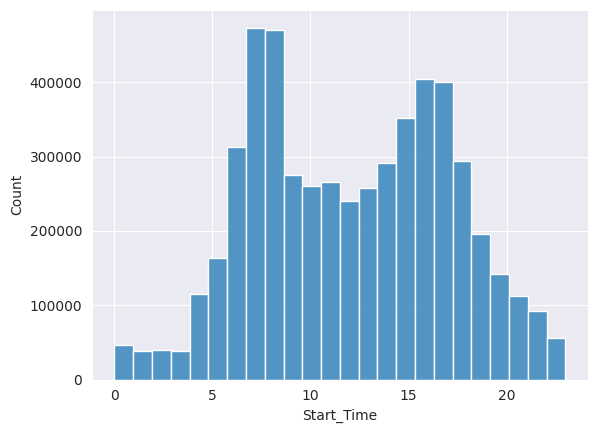

In [ ]:
#Ploting a histogram at what time of the day maximum accidents is happening between 7am to 9am in the morning time and 4pm to 6pm which is usually office hours.
sns.histplot(hour,bins=24)
#After analysing we can see maximum accidents is happening

In [ ]:
dayofweek=df.Start_Time.dt.dayofweek

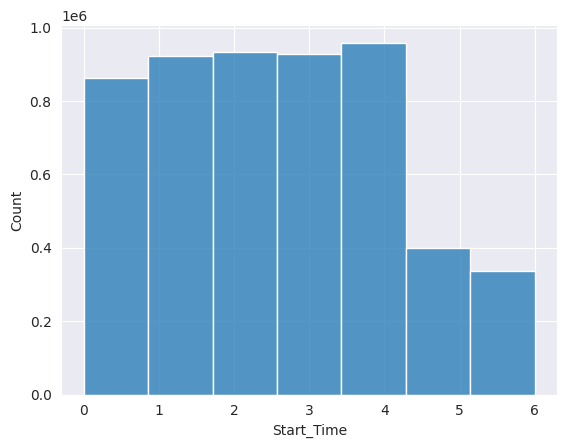

In [ ]:
#Analyzing the amount of accident in a week,so after analyzing the maximum accidents is happening in weekdays than on weekends.
dayofweek=sns.histplot(dayofweek,bins=7,kde=False)

<ipython-input-36-b3a01c229848>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sundays.dt.hour,bins=24,kde=False)


<Axes: xlabel='Start_Time'>

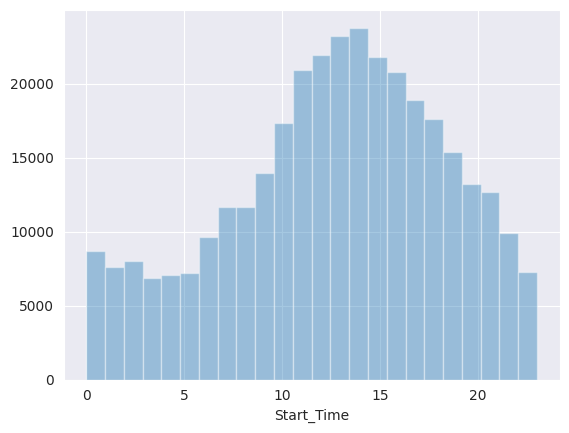

In [ ]:
sundays=df.Start_Time[df.Start_Time.dt.dayofweek==6]
sns.distplot(sundays.dt.hour,bins=24,kde=False)
#On sunday maximum accidents is occuring in afternoon time

<Axes: xlabel='Start_Time', ylabel='Count'>

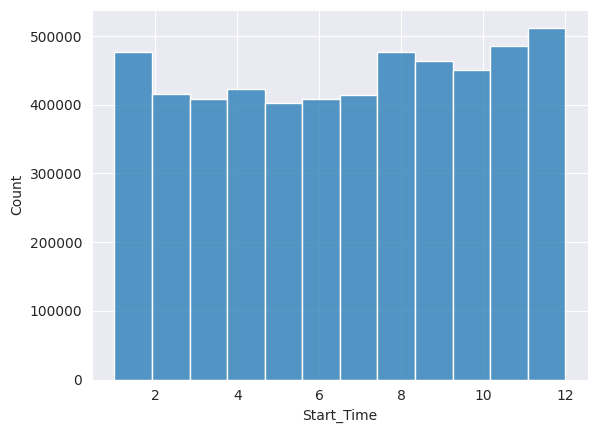

In [ ]:
#Monthly accident
sns.histplot(df.Start_Time.dt.month,bins=12,kde=False)

<Axes: xlabel='Start_Time', ylabel='Count'>

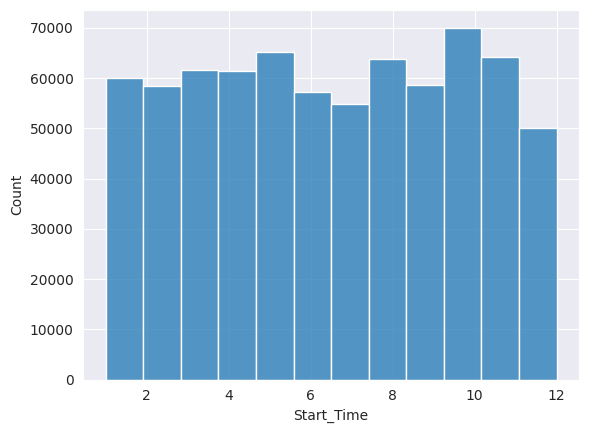

In [ ]:
#Yearly accident monthly
year_2023=df.Start_Time[df.Start_Time.dt.year==2023]
sns.histplot(year_2018.dt.month,bins=12,kde=False)

In [ ]:
df.Source.value_counts()

Source
Source2    3305373
Source1    2597238
Source3      97389
Name: count, dtype: int64

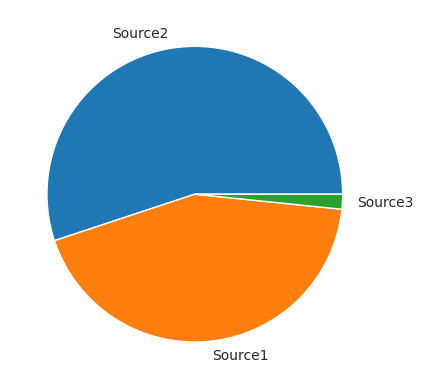

In [ ]:
from matplotlib import pyplot as plt
plt.pie(df.Source.value_counts(),labels=df.Source.value_counts().index);
#Maximum source of our data is coming from Source2.

<Axes: xlabel='Start_Time', ylabel='Count'>

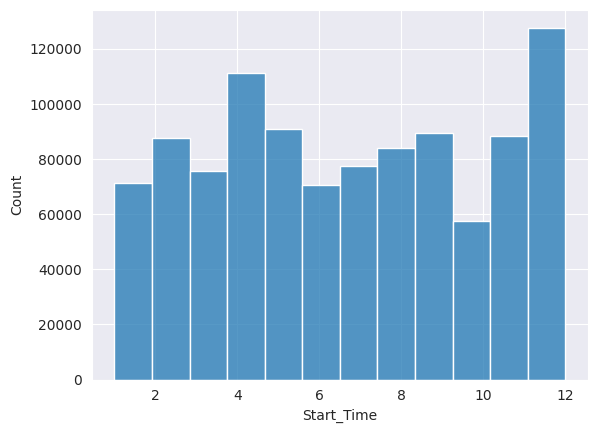

In [ ]:
df_2019=df[df.Start_Time.dt.year==2022]
df_2019=df_2019[df_2019.Source=='Source1']
sns.histplot(df_2019.Start_Time.dt.month,bins=12,kde=False)
# Many data is missing in 2016 year,Source3 distplot is not giving right distplot many unusual graph.

**Start_Lat and Start_long**

In [ ]:
df.Start_Lat

0          39.865147
1          39.928059
2          39.063148
3          39.747753
4          39.627781
             ...    
5999995    34.019453
5999996    30.067703
5999997    25.998799
5999998    26.014923
5999999    30.396641
Name: Start_Lat, Length: 6000000, dtype: float64

In [ ]:
df.Start_Lng

0          -84.058723
1          -82.831184
2          -84.032608
3          -84.205582
4          -84.188354
              ...    
5999995   -117.339659
5999996    -90.390133
5999997    -80.166514
5999998    -80.167252
5999999    -84.287109
Name: Start_Lng, Length: 6000000, dtype: float64

<Axes: xlabel='Start_Lat', ylabel='Start_Lng'>

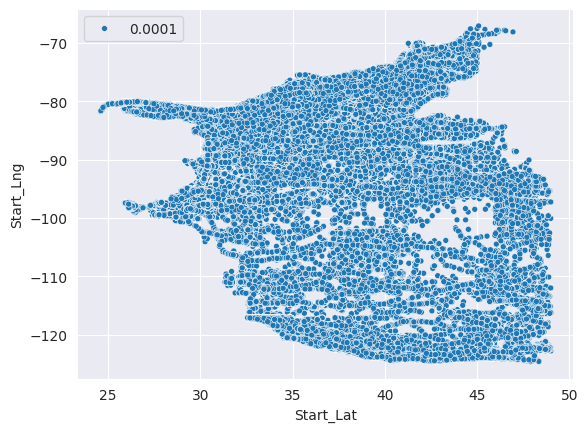

In [ ]:
sns.scatterplot(x=df.Start_Lat,y=df.Start_Lng,size=0.0001)

In [ ]:
import folium

In [ ]:
lat,lon=df.Start_Lat[0],df.Start_Lng[0]
lat,lon

(39.865147, -84.058723)

In [ ]:
pd.__version__

'2.1.4'

In [ ]:
# map=folium.Map()
# for x in df[['Start_Lat','Start_Lng']].sample(100).items():
#   marker=folium.Marker(x)
#   marker.add_to(map)
# map
sample_df=df.sample(int(0.001*len(df)))
len(sample_df)

6000

In [ ]:
#Taking .001 of the data to plot a map to analysis which location had maximum accident.
map=folium.Map()
from folium import plugins
from folium.plugins import HeatMap
folium.plugins.HeatMap(zip(list(sample_df.Start_Lat),list(sample_df.Start_Lng))).add_to(map)

In [ ]:
map
# Maximum accidents is taking place near coaster areas than the middle areas after looking at the map.